In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

    count      mean       std   min     25%   50%  75%    max
x  4000.0  2.982525  1.726627  0.13  1.6975  2.67  3.9  14.31
Rango 14.18
Coeficiente de variacion %: x    57.891453
dtype: float64
Coeficiente de variacion: x    0.578915
dtype: float64
Quintil 3: 3.08
Intercualtilico: x    2.2025
dtype: float64


(array([8.430e+02, 1.437e+03, 9.730e+02, 4.690e+02, 1.790e+02, 7.000e+01,
        2.000e+01, 6.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0.13 ,  1.548,  2.966,  4.384,  5.802,  7.22 ,  8.638, 10.056,
        11.474, 12.892, 14.31 ]),
 <BarContainer object of 10 artists>)

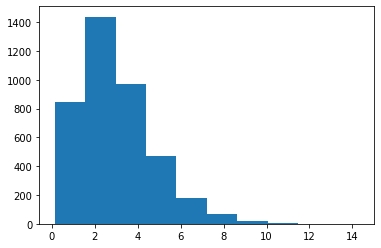

In [3]:
"""
Ejercicio 1, Summatry like (pd.describe) *No se puede hacer aún, no hay dataset*
"""
INCOMES = pd.read_csv('datos_brutos.csv', header=0)
n = len(INCOMES)
summary = INCOMES.describe().T
print(summary)
print('Rango',max(INCOMES['x']) - min(INCOMES['x']))
print('Coeficiente de variacion %:',summary['std']/summary['mean']*100)
print('Coeficiente de variacion:',summary['std']/summary['mean'])
# Print third quintile
print('Quintil 3:',np.quantile(INCOMES, .6))
print('Intercualtilico:',summary['75%'] - summary['25%'])
plt.hist(INCOMES)

In [4]:
"""
Ejercicio 2
Resultado de estudio de sustancias psicoactivas
"""
n = 242+58+93+12
j_fuman = 242+93
j_alcohol = 242+58
p_fuman = 100*j_fuman/n
p_fuman_que_alcohol = 100*242/j_fuman
p_alcohol_que_nofuman = 100*58/j_alcohol
p_fuman_y_alcohol = 100*(242)/n
print('P(fuman) = ', round(p_fuman,3))
print('P(fuman y alcohol) = ', round(p_fuman_y_alcohol,3))
print('P(fuman que alcohol) = ', round(p_fuman_que_alcohol,3))
print('P(alcohol que no fuman) = ', round(p_alcohol_que_nofuman,3))

P(fuman) =  82.716
P(fuman y alcohol) =  59.753
P(fuman que alcohol) =  72.239
P(alcohol que no fuman) =  19.333


In [5]:
"""
Ejercicio 3
Tabla de frecuencias absolutas de notas
"""

# Limites de los rangos
li = np.array([0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])
ls = np.array([.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
ranges = np.array(['[0, .5]', '(.5, 1]', '(1, 1.5]', '(0.5, 1]', '(2, 2.5]', '(2.5, 3]', '(3, 3.5]', '(3.5, 4]', '(4, 4.5]', '(4.5, 5]'])
# Marca de clase
yj = (li+ls)/2
# F. absolutas
nj = np.array([219, 86, 17, 5, 1, 1, 1, 1, 1, 1])
n = sum(nj) # Total de muestras
hj = nj/n # F. Relativas
Nj = nj.cumsum() # F. acumuladas
# F. acumuladas relativas
Hj = hj.cumsum()
table = pd.DataFrame({'R': ranges,'yj': yj, 'nj': nj, 'hj': hj*100, 'Nj': Nj, 'Hj': Hj*100})
mean= sum(hj*yj) # Promedio
#Median
k = np.argmin(abs(Hj-.5))
median = li[k]+(ls[k] - li[k])*((0.5*n - Nj[k-1])/nj[k])
variance = sum((nj*((yj-mean)**2))/(n-1)) # Varianza
std = np.sqrt(variance) # Desviación estándar
CV = std/mean # Coeficiente de Varianza
print(table)
print(k)
print('Proporción de estudiantes:',round(table['Hj'][9]-table['Hj'][6], 3))
print('Promedio:',round(mean, 3))
print('Mediana: ',round(median, 3))
print('Std:',round(std, 3))
print('Coeficiente de variación:',round(CV*100, 3))
3/n*100

          R    yj   nj         hj   Nj          Hj
0   [0, .5]  0.25  219  65.765766  219   65.765766
1   (.5, 1]  0.75   86  25.825826  305   91.591592
2  (1, 1.5]  1.25   17   5.105105  322   96.696697
3  (0.5, 1]  1.75    5   1.501502  327   98.198198
4  (2, 2.5]  2.25    1   0.300300  328   98.498498
5  (2.5, 3]  2.75    1   0.300300  329   98.798799
6  (3, 3.5]  3.25    1   0.300300  330   99.099099
7  (3.5, 4]  3.75    1   0.300300  331   99.399399
8  (4, 4.5]  4.25    1   0.300300  332   99.699700
9  (4.5, 5]  4.75    1   0.300300  333  100.000000
0
Proporción de estudiantes: 0.901
Promedio: 0.511
Mediana:  -0.38
Std: 0.534
Coeficiente de variación: 104.502


0.9009009009009009

(array([219.,  86.,  17.,   5.,   1.,   1.,   1.,   1.,   1.,   1.]),
 array([0.25, 0.7 , 1.15, 1.6 , 2.05, 2.5 , 2.95, 3.4 , 3.85, 4.3 , 4.75]),
 <BarContainer object of 10 artists>)

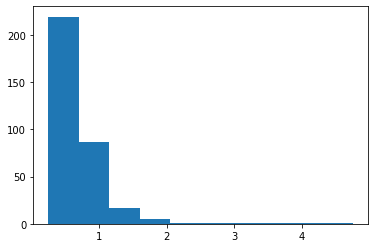

In [12]:
real_values = [[yj[i]]*nj[i] for i in range(len(nj))]
real_values = [x for x in real_values for x in x]
plt.hist(real_values)

Valor de varianza de datos agrupados:
$$
\begin{equation}
\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} n_i(y_i - \overline{x})^2
\end{equation}
$$
Por lo tnto, el valor de la desviación estándar es:
$$
\begin{equation}
\sigma = \sqrt{\sigma^2}
\end{equation}
$$

In [13]:
"""
Ejericio 9
"""

EDUCATION_INCOMES = pd.read_csv('datos_brutos_asociacion (1).csv.xls', header=0)
EDUCATION_INCOMES.head()

x_education = EDUCATION_INCOMES['x']
y_income = EDUCATION_INCOMES['y']

covariance = np.cov(x_education, y_income, ddof=1)[0][1]
corrcoef = np.corrcoef(x_education, y_income)[0][1]*100
x_variance = np.var(x_education, ddof=1)
pendient = covariance/x_variance
intercept = y_income.mean() - pendient*x_education.mean()
x = 15
evaluation = pendient*x + intercept
print('Cova:',covariance)
print('Corrcoef:',corrcoef)
print('Pendiente:',pendient)
print('Intercept:',intercept)
print('Evaluación a x=15 años:',evaluation)

Cova: 3.35632510216402
Corrcoef: 93.43778890597643
Pendiente: 0.502554846616321
Intercept: 0.9705657800304461
Evaluación a x=15 años: 8.50888847927526


In [ ]:
n_x = 100
n_y = 100
n = 200
x_mean = 4.993
y_mean = 3.505
mean = 4.249
x_std = 0.131
y_std = 0.084
std = 0.754
t_variance = std**2

intravariance = ((n_x-1)*(x_std**2) + (n_y-1)*(y_std**2))/(n-1)
intervariance = (n_x*((x_mean-mean)**2) + n_y*((y_mean - mean)**2))/(n-1)
intra_p = intravariance/t_variance
inter_p = intervariance/t_variance
print('Intra_p:', round(intra_p*100, 3))
print('Intre_p:', round(inter_p*100, 3))

Intra_p: 2.119
Intre_p: 97.854
